# Advanced Algorithms and Parallel Programming
## Summer Session Project on Advanced Algorithms
## Student: Samuel Polo - 10670388

# General Notebook

## Retiming of a Circuit Graph

Problem: Optimize frequency of a circuit

Solutions: 
Move register(s) so that:
	- clock cycle decreases or number of registers decreases.
	- input-output behavior is preserved.

## Import Graph-Tool Module

In [20]:
import graph_tool.all as gt
import numpy as np

# Retiming Graph Examples

## Example 1

<Graph object, directed, with 4 vertices and 5 edges, 1 internal vertex property, 1 internal edge property, at 0x7f4be9f15400>


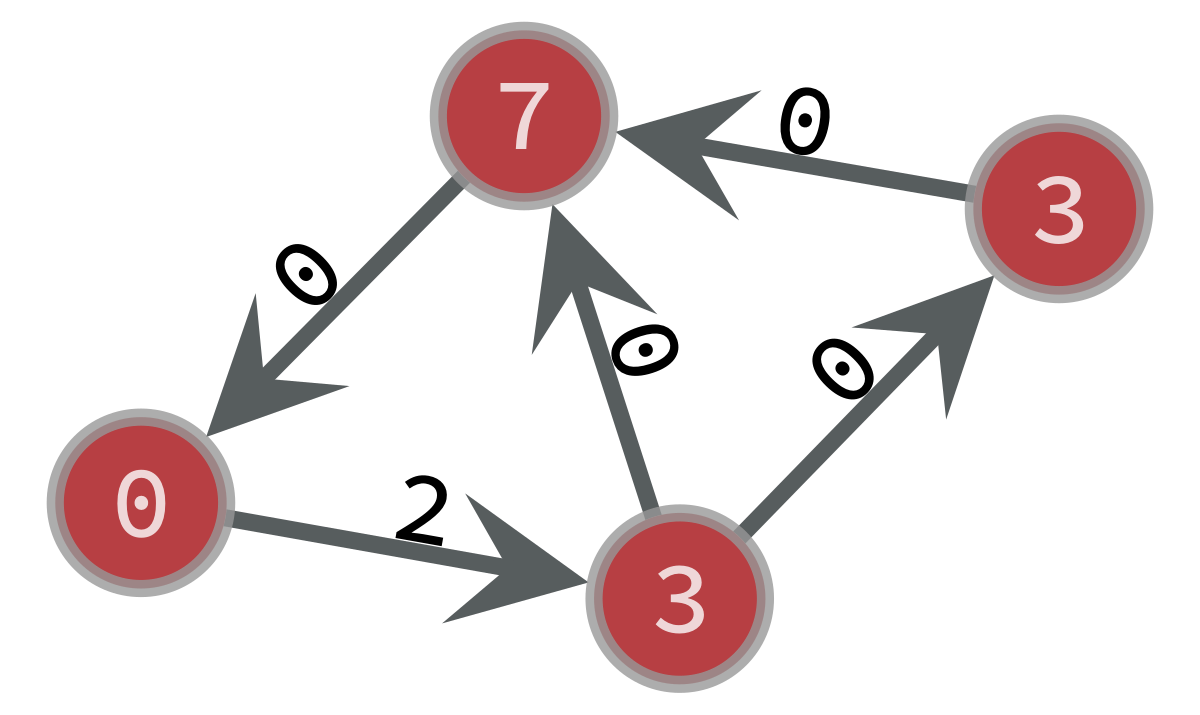

Vertex 0 with capacity: 0
Vertex 1 with capacity: 3
Vertex 2 with capacity: 3
Vertex 3 with capacity: 7
cap            (vertex)  (type: int32_t)
weight         (edge)    (type: double)
None


In [21]:
#Example taken from: https://people.eecs.berkeley.edu/~keutzer/classes/244fa2005/lectures/8-2-retiming-ucb.pdf and 
#SummerSessionProjectAA.pptx
g = gt.Graph()

edge_weight = g.new_edge_property("double")
g.edge_properties["weight"] = edge_weight
edge_str_weight = g.new_edge_property("string")

vlist = g.add_vertex(4) #Creation of vertices

edges = [[0,1],[1,2],[1,3],[2,3],[3,0]] #array of Edges 

nodeCapacity = [0,3,3,7] #Aka "d(node_i)" #Array d(v) in the paper (Propagation delay)

cap = g.new_vertex_property("int")

weights = [2,0,0,0,0] #array of weights "w" (Register count) 

for i in range(len(list(vlist))):
    cap[i] = nodeCapacity[i]

g.vertex_properties["cap"] = cap    #Array d(v) in the paper (Propagation delay)

for i in range(len(edges)):
    e = g.add_edge(edges[i][0], edges[i][1])
    g.ep.weight[e] = weights[i]
    edge_str_weight[e] = str(weights[i])
    
print(g)
gt.graph_draw(g, vertex_text=g.vp.cap, edge_text=edge_str_weight)

for v in g.vertices():
    print("Vertex %s with capacity: %s" % (v, g.vp.cap[v]))
    
print(g.list_properties())

## Example 2

<Graph object, directed, with 8 vertices and 11 edges, 1 internal vertex property, 1 internal edge property, at 0x7f4be9f15b20>


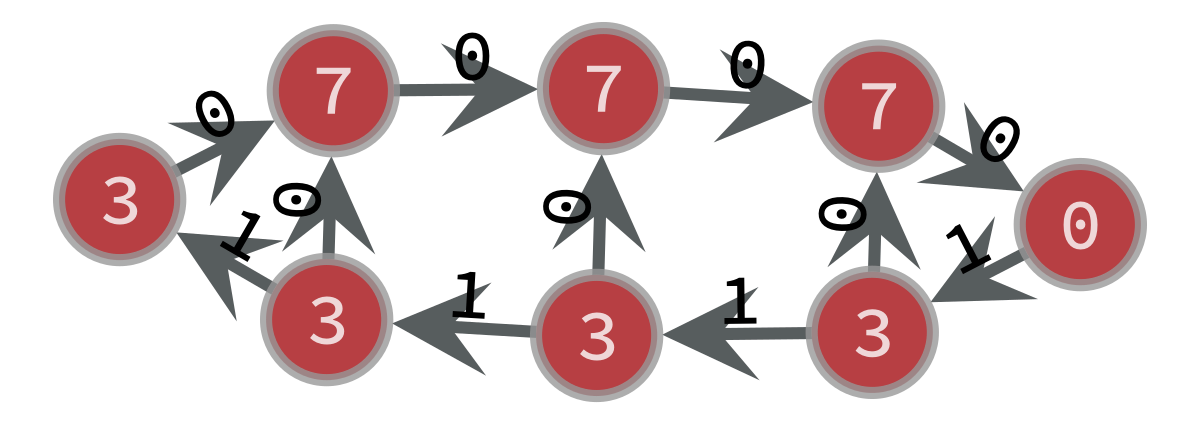

Vertex 0 with capacity: 0
Vertex 1 with capacity: 3
Vertex 2 with capacity: 3
Vertex 3 with capacity: 3
Vertex 4 with capacity: 3
Vertex 5 with capacity: 7
Vertex 6 with capacity: 7
Vertex 7 with capacity: 7
cap            (vertex)  (type: int32_t)
weight         (edge)    (type: double)
None


In [22]:
#Example taken from: [1] 
g = gt.Graph()

edge_weight = g.new_edge_property("double")
g.edge_properties["weight"] = edge_weight
edge_str_weight = g.new_edge_property("string")

vlist = g.add_vertex(8) #Creation of vertices. Array of Vertices 

edges = [[0,1],[1,7],[1,2],[2,6],[2,3],[3,4],[3,5],[4,5],[5,6],[6,7],[7,0]] #array of Edges 

nodeCapacity = [0,3,3,3,3,7,7,7] #Aka "d(node_i)" #Array d(v) in the paper (Propagation delay)

cap = g.new_vertex_property("int")

weights = [1,0,1,0,1,1,0,0,0,0,0,0] #array of weights "w" (Register count) 
#print(edges[0][1])

for i in range(len(list(vlist))):
    #g.vp.cap[g.vertex(i)] = nodeCapacity[i] //Documentation Bug
    cap[i] = nodeCapacity[i]

g.vertex_properties["cap"] = cap    #Array d(v) in the paper (Propagation delay)

for i in range(len(edges)):
    e = g.add_edge(edges[i][0], edges[i][1])
    #randomNumber = np.random.randint(10)
    g.ep.weight[e] = weights[i]
    edge_str_weight[e] = str(weights[i])
    
print(g)
gt.graph_draw(g, vertex_text=g.vp.cap, edge_text=edge_str_weight)

#for e in g.edges():
    #print(edge_weight[e])

for v in g.vertices():
    print("Vertex %s with capacity: %s" % (v, g.vp.cap[v]))
    
print(g.list_properties())

# Implemented Algorithms

## Graph Generators

## Restrictions on Graph Generation
In order that a graph G = (V, E, d, w) have well-defined physical meaning
as a circuit, we place nonnegativity restrictions on the propagation delays
d(v) and the register counts w(e):

D1. The propagation delay d(v) is nonnegative for each vertex v belonging to V.

W1. The register count w(e) is a nonnegative integer for each edge e belonging to E.
We also impose the restriction that there be no directed cycles of zero weight:

W2. In any directed cycle of G, there is some edge with (strictly) positive
register count.

In [23]:
def sample_k(): #Sample to generate the In and Out Degree of each node in the graph. 
    #Taken from Graph-Tool documentation: A degree sampler function which is called without arguments, and returns a 
    #tuple of ints representing the in and out-degree of a given vertex (or a single int for undirected graphs, 
    #representing the out-degree).
    inOutDegree = np.random.randint(maxNodeDegree, size=2)
    if (inOutDegree[0] == 0): #Since all the graph needs to be connected, we impose at least one edge for each node.
        inOutDegree[0] = 1
    if (inOutDegree[1] == 0): #Since all the graph needs to be connected, we impose at least one edge for each node.
        inOutDegree[1] = 1
    return inOutDegree

Complexity of sample_k(): O(1)

In [24]:
def graphGenerator(nodes_size, delayRange=None, simpleDelayArray=True, weightRange=3, seed=None):
    #The following function generates a random graph with the following inputs:
    #nodes_size: number of vertices/nodes in the graph.
    #delayRange: specifies the range from [0-delayRange] in order to create an array of propagation delay.
    #simpleDelayArray: if it's true, the propagation delay of each index will be equal to the index of the vertex.
    #seed: a certain seed can be stated in order for the results to be totally reproducible. 
    #In order to do a quick test of the graph generator, the default values for a graph generation is to create
    #a graph with simple (random) values for the weight and simple values for the propagation delay of the index.
    
    if(seed!= None): #In order to make our data reproducible, we put a certain seed. 
            
        gt.seed_rng(seed)

        np.random.seed(seed)
        
    g = gt.random_graph(nodes_size, sample_k) #Execute graph_tool random graph generator with a certain numbers of nodes and
                                              #the sample_k
    
    edge_weight = g.new_edge_property("double") #Add a property to each edge of the graph.
    g.edge_properties["weight"] = edge_weight   #Rename that property to use it in the code as: g.ep.weight
    cap = g.new_vertex_property("int")          #Add a property to each vertex of the graph.
    g.vertex_properties["cap"] = cap            #Rename that property to use it in the code as: g.vp.cap
    
    #Note: the name "cap" was used as a placeholder of "propagation delay" since it's similar to a flow problem.
    #The name is just for intuitive purposes and doesn't change the internal logic of any algorithm. 

    #The weight of an edge will be a random positive number between 0 and weightRange (default value: 3). 
        
    for edge in g.edges():
        g.ep.weight[edge] = np.random.randint(weightRange, size=1)[0] 

    if (simpleDelayArray): #If it's true, the propagation delay array d(v) will be the index of the node. e.g d(0) = 0; d(4) = 4
            
        for vertex in g.vertices(): #Simple propagation delay creation. 
            g.vp.cap[vertex] = int(vertex)
    
    else:
        delayArray = np.random.randint(delayRange, size=nodes_size)
        for i in range(nodes_size): 
            g.vp.cap[i] = delayArray[i]
    
    for c in gt.all_circuits(g): #We do this validation in order to respect constraint W2.
        #print(c) Print each cycle of the graph. 
        pathSum = 0
        for item in range(len(c)-1):
            pathSum = pathSum + g.ep.weight[g.edge(c[item],c[item+1])]
            #print(pathSum)
        #Final edge sum: (edge(initial node of the cycle,last node before initial node))
        pathSum = pathSum + g.ep.weight[g.edge(c[item+1],c[0])]
        if(pathSum == 0): #If a cycle with zero weight is found.
            print("Cycle with Zero weight detected!")
            g.ep.weight[g.edge(c[item+1],c[0])] = 1 #Add 1 to the last edge in order to make it different from 0.
                                                    #This is a simply solution in order to not violate constraint W2. 
            print("Edge: %s modificated with value 1!" % (g.edge(c[item+1],c[0])))
        #else:
            #print("Path SUM: %s" % (pathSum))
    
    gt.graph_draw(g, vertex_text=g.vertex_index, edge_text=g.ep.weight) #Graph the draw for visualization.
    return g

Note: the complexities of the library methods were taken straight from the documentation [2].

### Complexity of:
    -gt.random_graph(): O(V+E) if parallel edges are allowed, and O(V+E×n-iter) if parallel edges are not allowed.
    -for edges: O(E)
    -for vertex: O(V)
    -gt.all_circuits(): O[(V+E)(C+1)] , where C is the number of circuits.
    -Nested loop: O([(V+E)(C+1)]*M), where M is the number of elements in the circuit.
    
    -graph_generator(): O([(V+E)(C+1)]*M)

In [25]:
def graphCorrelator(nodes_size, seed=None): 
    #Create a Graph correlator based on the examples from Leiserson and Saxe. This generator can be seen as a specific case
    #of the previous graph generator where the host node has 0 propagation delay, "bottom" nodes have 3 propagation delay and
    #upper nodes have 7. Weights are a number in the range [0-5].
    if (nodes_size < 3):
        print("Error: a correlator must have a number of nodes equal or greater than 3.")
    elif (nodes_size == 3):
        g = gt.Graph() #Base Case
    
        edge_weight = g.new_edge_property("double") #Add a property to each edge of the graph.
        g.edge_properties["weight"] = edge_weight   #Rename that property to use it in the code as: g.ep.weight
        cap = g.new_vertex_property("int")          #Add a property to each vertex of the graph.
        g.vertex_properties["cap"] = cap            #Rename that property to use it in the code as: g.vp.cap
        
        g.add_vertex(3)
        g.vp.cap[0] = 0
        g.vp.cap[1] = 3
        g.vp.cap[2] = 7
        
        g.add_edge(0,1)
        g.add_edge(1,2)
        g.add_edge(2,0)
        
        for edge in g.edges():
            g.ep.weight[edge] = np.random.randint(3, size=1)[0] 
        
    else: #General Case
        g = gt.Graph()
    
        edge_weight = g.new_edge_property("double") #Add a property to each edge of the graph.
        g.edge_properties["weight"] = edge_weight   #Rename that property to use it in the code as: g.ep.weight
        cap = g.new_vertex_property("int")          #Add a property to each vertex of the graph.
        g.vertex_properties["cap"] = cap            #Rename that property to use it in the code as: g.vp.cap
        
        g.add_vertex(nodes_size) #Create the specific number of vertex in the graph. 
        
        if (nodes_size % 2 == 0):
            numberOf7 = (nodes_size//2)-1
        else:
            numberOf7 = (nodes_size//2)
        
        numberOf3 = (nodes_size//2)
        
        #Creation of "bottom circuit" 
        for i in range(numberOf3): #Creation of nodes with 3 as propagation delay. 
            g.add_edge(i,i+1)
        
        i = i + 1 #Increase i in order to connect the appropiate edges.
        
        #Creation of "upper circuit" 
        for j in range(i, i+numberOf7): #Creation of nodes with 7 as propagation delay.
            g.add_edge(j,j+1)
        
        #Final Edge from last vertex with 7 to Host 0:
        g.add_edge(nodes_size-1, 0)
        
        #Intermediate Edges (from vertex with propagation delay 3 to 7)
        for i in range(1, numberOf3):
                g.add_edge(i, nodes_size-i)
        
        #Propagation Delay Assignation
        for i in range(1, numberOf3+1): #We add 1 to numberOf3 in order to include the final vertex of d(v) = 3.
            g.vp.cap[i] = 3
        
        for j in range(i+1, nodes_size):
            g.vp.cap[j] = 7
        
        #Weight Assignation
        for edge in g.edges():
            g.ep.weight[edge] = np.random.randint(3, size=1)[0] 
        
    if (nodes_size >= 3):
        for c in gt.all_circuits(g): #We do this validation in order to respect constraint W2.
            pathSum = 0
            for item in range(len(c)-1):
                pathSum = pathSum + g.ep.weight[g.edge(c[item],c[item+1])]

            pathSum = pathSum + g.ep.weight[g.edge(c[item+1],c[0])]
            if(pathSum == 0): #If a cycle with zero weight is found.
                print("Cycle with Zero weight detected!")
                g.ep.weight[g.edge(c[item+1],c[0])] = 1 #Add 1 to the last edge in order to make it different from 0.
                                                        #This is a simply solution in order to not violate constraint W2. 
                print("Edge: %s modificated with value 1!" % (g.edge(c[item+1],c[0])))
                
        gt.graph_draw(g, vertex_text=g.vp.cap, edge_text=g.ep.weight) #Graph the draw for visualization.
        return g

### Complexity of:
    -gt.all_circuits(): O[(V+E)(C+1)] , where C is the number of circuits.
    -Nested loop: O([(V+E)(C+1)]*M), where M is the number of elements in the circuit.
    
    -graphCorrelator(): O([(V+E)(C+1)]*M)

## Algorithm WD

In [26]:
def WD(graph): #Algorithm WD that computes both the W and the D matrix from a known graph. 
    W = np.zeros((graph.num_vertices(),graph.num_vertices())) #Initialize W Matrix
    D = np.zeros((graph.num_vertices(),graph.num_vertices())) #Initialize D Matrix
    #print(W)
    #print(D)

    g2 = gt.Graph(graph) #Copy the graph to perform other operations.

    ordered_pair = g2.new_edge_property("vector<int>")
    g2.edge_properties["weight_pair"] = ordered_pair

    for edge in graph.edges():
        g2.ep.weight_pair[edge] = [graph.ep.weight[edge], graph.vp.cap[edge.source()]*(-1)]
    
    for i in range(graph.num_vertices()):
        for j in range(graph.num_vertices()):
            if (i!=j): #Exclude the same node path calculation.
                #Calculate the total weight of the path we just got.
                path = gt.shortest_path(g2, i, j)
                weightSum = [0,0] #Ordered pair weightSum [x,y] that will be: [w(e), -d(u)]
                for item in path[1]:
                    #print(item)
                    weightSum = [weightSum[0] + g2.ep.weight_pair[item][0], weightSum[1] + g2.ep.weight_pair[item][1]]

                #print(weightSum)
                #Coge weightSum y haz las respectivas operaciones con (x,y); W(u,v) y D(u,v)              

                W[i][j] = weightSum[0] #W(u,v) = x 
                #print(W[i][j])

                D[i][j] = g2.vp.cap[j] - weightSum[1] #D(u,v) = d(v) -y
                #print(D[i][j])
            else:
                D[i][j] = graph.vp.cap[graph.vertex(i)]


    #print("W Matrix: ") #Erased because of Profiler.
    #print(W)
    #print("D Matrix: ")
    #print(D)
    return [W,D]

Complexity of Algorithm WD: O(N^3)

## Clock Period Algorithm

In [27]:
def cp(graph, display=False):
    g0 = gt.Graph(graph)
    
    removedEdges = []

    for edge in g0.edges():
        if (g0.ep.weight[edge]!=0):
            removedEdges.append([edge.source(),edge.target()])

    delta = g0.new_vertex_property("int") #Property delta(node) in the reference paper.

    for i in range(len(list(g0.vertices()))):
        delta[i] = 0

    g0.vertex_properties["delta"] = delta

    for i in range(len(removedEdges)):
        g0.remove_edge(g0.edge(removedEdges[i][0], removedEdges[i][1]))

    if(display):
        gt.graph_draw(g0, vertex_text=g0.vp.cap, edge_text=g0.ep.weight)
        
    #Topological Sort
    
    sortedGraph = gt.Graph(g0)
    tree = gt.min_spanning_tree(g0)
    g0.set_edge_filter(tree)
    sort = gt.topological_sort(g0)
    if (display):
        print(sort)
    
    #Calculate Clock Period of the Graph:
    for node in sort:

        if (g0.vertex(node).in_degree()==0): #If the node doesn't have incoming edges. 
             g0.vp.delta[node] = g0.vp.cap[node]
        else:
            maxDelta = 0
            for edge in g0.vertex(node).in_edges():
                if (g0.vp.delta[g0.vertex(edge.source())] > maxDelta):
                    maxDelta = g0.vp.delta[g0.vertex(edge.source())]

            g0.vp.delta[node] = g0.vp.cap[node] + maxDelta

    clockPeriod = 0
    for node in sort:
        if (g0.vp.delta[node] > clockPeriod): #Update clock period 
            clockPeriod = g0.vp.delta[node]

    if(display):
        print("Clock Period of the graph is: " + str(clockPeriod))
    
    return g0, clockPeriod

## FEAS Algorithm

In [28]:
def FEAS(g, c): #Input: Graph g, clock period 'c' from D(u,v); Output: Clock period and optimal retiming found.  
                #For visualization purposes, the majority of graph drawings, sorts and other data outputs no more important 
                #than the clock period and the retiming is omitted to show a clean answer.
                #The notebook: 'RetimingProject_10670388_FEAS' shows the solution with more steps. 
    retimings = []
    for i in range(g.num_vertices()):
        retimings.append(0)
    #print(retimings)

    for i in range(g.num_vertices()-1):
    
        #We proceed to calculate the new retiming weights.
        gFinal = gt.Graph(g)
        #print(gFinal)

        for edge in gFinal.edges():
            source = int(str(edge.source())) #Get source node from edge.
            target = int(str(edge.target())) #Get target node from edge.
            gFinal.ep.weight[edge] = gFinal.ep.weight[edge] + retimings[target] - retimings[source] 

        #Compute Clock Period Algorithm (Algorithm CP)
            
        solution = cp(gFinal)[0]
      
        #print("Clock Period of the graph is: " + str(clockPeriod))

        for vertex in solution.vertices():
            if (solution.vp.delta[vertex]>c):
                retimings[int(vertex)] = retimings[int(vertex)] + 1 #Get new Retimings.

        #print(retimings)

    #Perform algorithm CP Again. 
    
    clockPeriod = cp(solution)[1]
    
    #print("FEAS Algorithm finished with c: "+str(c))
    #print("Clock Period of the graph is: " + str(clockPeriod))

    
    #if (clockPeriod > c):
     #   print("No feasible retiming exists.")
    #else:
     #   print("Retiming: %s is the desired retiming." % (retimings))
        
    return clockPeriod, retimings

Complexity of FEAS Algorithm: O(|V| |E|^2)

## Algorithm OPT1

In [36]:
def OPT1(g):
    tupleWD = WD(g) #Perform W and D matrix computation for the algorithm #Step 1 from OPT1.
    W = tupleWD[0]
    D = tupleWD[1]
    copyD = np.copy(D) #This is the array we will sort. 
    copyD = np.unique(copyD) #Step 2 from OPT1.
    #r(u) - r(v) <= w(e)
    optimalRetiming = []
    
    minimumClockPeriod = 999
    for i in range(len(copyD)):     #Gets calculated with sorted D(u,v)

        c = copyD[i]
        
        # print("Test with C: "+str(c)) Erased Because of Profiler
        
        g5 = gt.Graph(g) #Create a copy of the graph in order to perform other operations. 

        nodesSize = g5.num_vertices() #Get the number of the nodes.

        g5.add_vertex() #Add new artificial node to perform the shortest-path. 

        for i in range(nodesSize):
            e = g5.add_edge(nodesSize, i) #We add the nodesSize number-index as the new node for the Bellman Ford algorithm.
            g5.ep.weight[e] = 0

        for edge in g5.edges(): #Visualization purposes. #Theorem 7.1 in the Reference Paper.
            if (edge.source()!=nodesSize and edge.target()!=nodesSize):

                #print("r(u): %s, r(v): %s with edge: %s" % (edge.source(), edge.target(), edge_weight[edge]))

                source = int(str(edge.source()))
                target = int(str(edge.target()))

        for node1 in range(g5.num_vertices()): #Theorem 7.2 in the Reference Paper.
            for node2 in range(g5.num_vertices()):

                if (node1!=node2 and node1!= nodesSize and node2!= nodesSize):
                    if (D[node1][node2] > c):
                        if(not( ( (D[node1][node2] - g5.vp.cap[node1]) > c) or ( (D[node1][node2] - g5.vp.cap[node2]) > c) ) ):
                            e = g5.add_edge(node1,node2)
                            g5.ep.weight[e] = W[node1][node2] - 1

        #(Inequalities)
        minPathSums = [] #Initialize the array of Minimum Path Sums
        minPath = []

        for i in range(nodesSize):
            minPathSums.append(999)

        isPossible = True #Flag in order to know if there is not any violation in the constraints. 
        for i in range(nodesSize):
            if (isPossible):
                try:
                    path = gt.shortest_path(g5, nodesSize, i, weights=g5.ep.weight, negative_weights=True) 
                    #print(path)
                    pathSum = 0 

                    for item in path[1]:        
                        pathSum = pathSum + g5.ep.weight[item] 

                    if (pathSum < minPathSums[i]):
                            minPathSums[i] = pathSum
                            minPath = path
                            
                    #print("Variable: %s , value: %s " % (i,minPathSums[i]))
                    #print("Minimum path:")
                    #print(minPath)
                except ValueError: 
                    isPossible = False
                    #print("Negative Loops Found. Skipping Solution...")

        if (isPossible):
            #Now that we found a solution to the Linear Inequalities, we proceed to calculate the new retiming weights.

            #for i in range(len(minPathSums)):
                #print(minPathSums[i])
                        
            gFinal = gt.Graph(g)
                #print(gFinal)

            for edge in gFinal.edges():
                source = int(str(edge.source()))
                target = int(str(edge.target()))
                gFinal.ep.weight[edge] = gFinal.ep.weight[edge] - minPathSums[target] + minPathSums[source] 
                #The reason the subtraction is swapped here is because the edges for the Bellman-Ford algorithm 
                #were created in the inverse order for simplification purposes.
                #By replacing the target and the source operation, we get the original operation with values that satisfy
                #the Theorem 7. 
                #print("Edge: %s with new value: %s" % (edge, gFinal.ep.weight[edge]))

            #New Graph Gr
            #print("New Graph Gr: ")
            #gt.graph_draw(gFinal, vertex_text=gFinal.vertex_index, edge_text=gFinal.ep.weight)
            
            clockPeriod = cp(gFinal)[1]

            #print("Clock Period of the graph is: %s with value of c as: %s" % (clockPeriod, c)) #ERASED PROFILING
            if (clockPeriod < minimumClockPeriod):
                minimumClockPeriod = clockPeriod
                clockPeriodFound = c
                optimalRetiming = minPathSums

    print("Minimum Clock Period is: %s with c: %s" % (minimumClockPeriod, clockPeriodFound))
    print("Retiming: %s" % (optimalRetiming))
    return optimalRetiming

Complexity of Algorithm OPT1: O(|V|^3 lg |V|)

## Algorithm OPT2

In [30]:
def OPT2(graph): #Algorithm OPT2 from the Reference paper. Complexity of the algorithm in O(|V| |E| lg |V|) time.
    tupleWD = WD(graph) #Perform W and D matrix computation for the algorithm
    W = tupleWD[0]
    D = tupleWD[1]
    copyD = np.copy(D) #This is the array we will sort. 
    copyD = np.unique(copyD)
    minimumClockPeriod = 999
    optimalRetiming = []
    for i in range(len(copyD)): 

        c = copyD[i]
        #print("Test with C: "+str(c))
        
        solution = FEAS(graph,c) #Execute FEAS Algorithm that will give us a tuple = [clock_period, retimings]
        
        clockPeriod = solution[0]
        retimings = solution[1]
       
        #print("Clock Period of the graph (OPT2) is: %s" % (clockPeriod))
        
        #if (clockPeriod > c):
         #   print("No feasible retiming exists.")
        #else:
         #   if(clockPeriod < minimumClockPeriod):
          #      minimumClockPeriod = clockPeriod
           #     optimalRetiming = retimings
            #    print("Retiming: %s is the desired retiming." % (retimings))
            #else:
             #   print("It doesn't improve the retiming.")
                
        if (clockPeriod <= c):
            if(clockPeriod < minimumClockPeriod):
                minimumClockPeriod = clockPeriod
                optimalRetiming = retimings
                #print("Retiming: %s is the desired retiming." % (retimings))
            #else:
                #print("It doesn't improve the retiming.")

    print("Minimum Achievable Clock Period is: %s with retiming: %s" % (minimumClockPeriod, optimalRetiming))
    return minimumClockPeriod, optimalRetiming

Complexity of OPT2: O(|V| |E| lg |V|)

# Algorithm Execution

Since any algorithm just needs as input the graph (with the exception of FEAS that need the graph and a clock period c), we can execute the specific algorithm need with a simple function with a graph that has to be already created. 

Example: 

In [31]:
print(FEAS(g,7)) #Perform execution of FEAS Algorithm with input: Graph g and clock period 7.

(14, [5, 4, 3, 3, 2, 3, 4, 5])


In [45]:
import time

In [39]:
start = time.process_time()
print(OPT1(g))
end = time.process_time()

print(end-start)

Minimum Clock Period is: 13 with c: 13.0
Retiming: [-2.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0]
[-2.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0]
0.07848178699999986


In [40]:
start = time.process_time()
print(OPT2(g))
end = time.process_time()

print(end-start)

Minimum Achievable Clock Period is: 13 with retiming: [2, 1, 0, 0, 0, 0, 1, 2]
(13, [2, 1, 0, 0, 0, 0, 1, 2])
0.2478429059999998


As we can see, both OPT1 and OPT2 give us the same retiming and minimum clock period for the stated graph. OPT1 can give us negative components because of the negative paths during Bellman-Ford and OPT2 gives us positive components because each step is increased by one.

In [46]:
#We can use a saved graph in order to do calculations.
g100 = gt.load_graph("my_graph2.xml.gz")

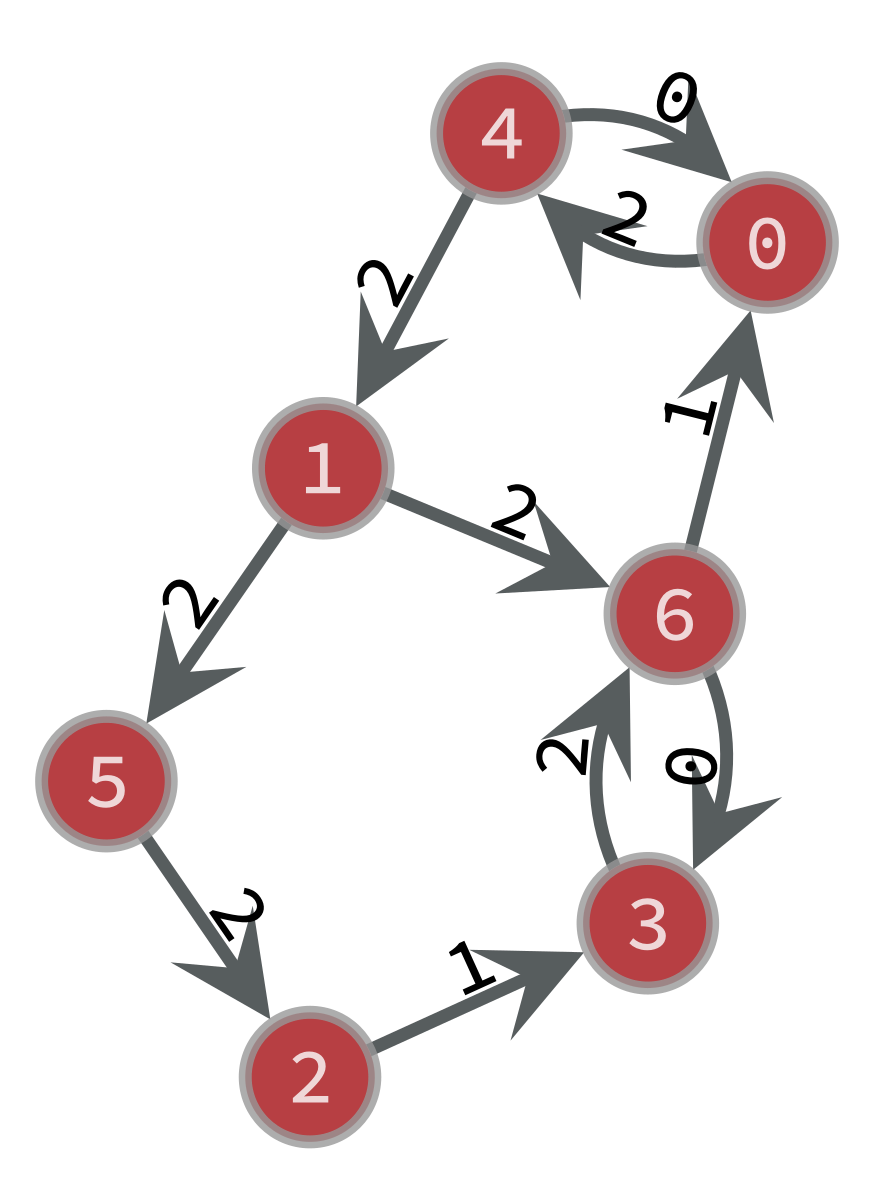

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f4be9eeabe0, at 0x7f4be9f01f40>

In [47]:
gt.graph_draw(g100, vertex_text=g100.vp.cap, edge_text=g100.ep.weight)

In [48]:
print(OPT1(g100))

Minimum Clock Period is: 6 with c: 6.0
Retiming: [0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0]


In [49]:
print(OPT2(g100))

Minimum Achievable Clock Period is: 6 with retiming: [0, 0, 0, 1, 0, 0, 0]
(6, [0, 0, 0, 1, 0, 0, 0])


In [50]:
print(FEAS(g100, 13))

(9, [0, 0, 0, 0, 0, 0, 0])


In [51]:
gtest = gt.load_graph("generatedGraph.xml.gz")

In [52]:
print(OPT1(gtest))

Minimum Clock Period is: 12 with c: 12.0
Retiming: [0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0.0, -1.0, -1.0]
[0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0.0, -1.0, -1.0]


In [53]:
print(OPT2(gtest))

Minimum Achievable Clock Period is: 12 with retiming: [0, 0, 0, 1, 1, 0, 0, 0, 1, 1]
(12, [0, 0, 0, 1, 1, 0, 0, 0, 1, 1])


In [54]:
gtest2 = gt.load_graph("generatedGraph2.xml.gz")

In [55]:
print(OPT1(gtest2))

Minimum Clock Period is: 9 with c: 0.0
Retiming: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [56]:
print(OPT2(gtest2))

Minimum Achievable Clock Period is: 9 with retiming: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
(9, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [57]:
correlator = gt.load_graph("correlatorGraph.xml.gz")

In [58]:
print(OPT1(correlator))

Minimum Clock Period is: 9 with c: 9.0
Retiming: [0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0]


In [59]:
print(OPT2(correlator))

Minimum Achievable Clock Period is: 9 with retiming: [0, 0, 0, 0, 0, 1, 0, 0]
(9, [0, 0, 0, 0, 0, 1, 0, 0])


In [60]:
print(OPT1(g))

Minimum Clock Period is: 13 with c: 13.0
Retiming: [-2.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0]
[-2.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0]


In [61]:
print(OPT2(g))

Minimum Achievable Clock Period is: 13 with retiming: [2, 1, 0, 0, 0, 0, 1, 2]
(13, [2, 1, 0, 0, 0, 0, 1, 2])


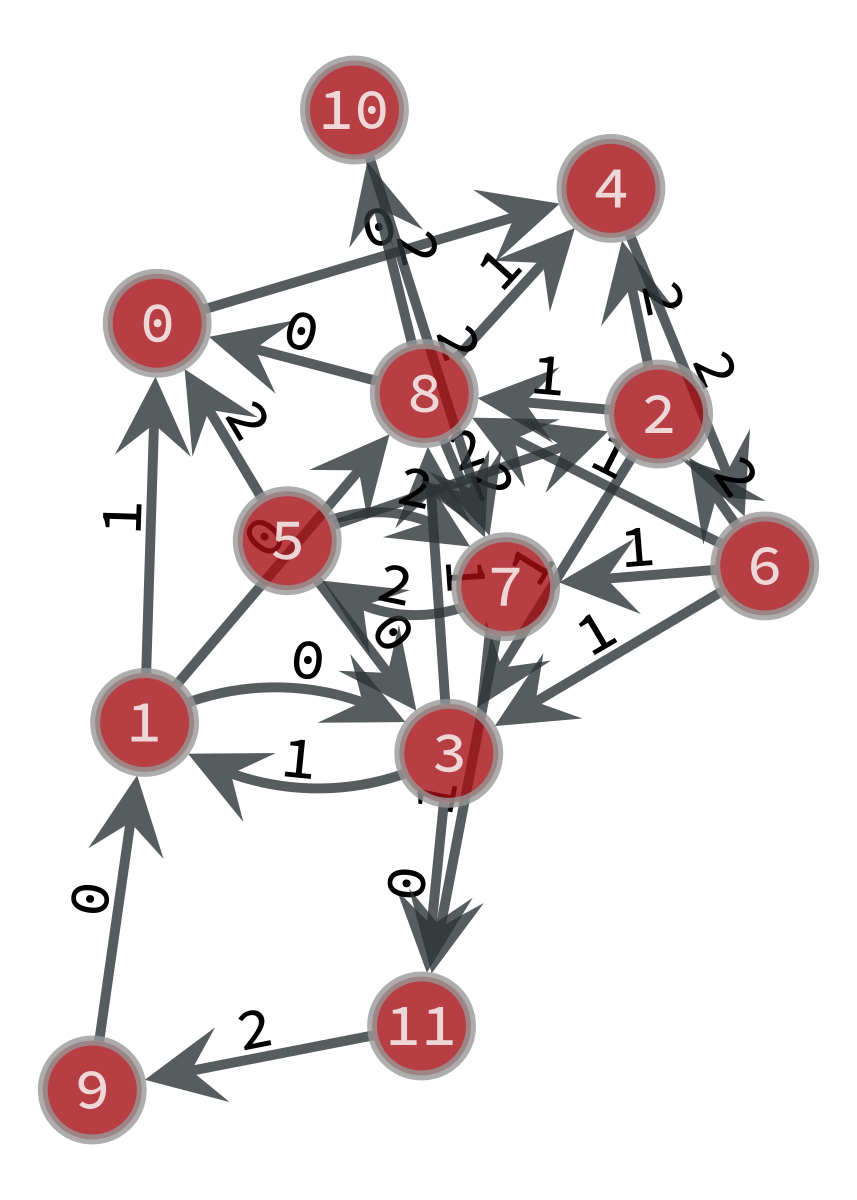

In [62]:
maxNodeDegree = 5
gPrueba1 = graphGenerator(12)

In [63]:
print(OPT1(gPrueba1))

Minimum Clock Period is: 13 with c: 13.0
Retiming: [-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1.0]
[-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1.0]


In [64]:
print(OPT2(gPrueba1))

Minimum Achievable Clock Period is: 13 with retiming: [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
(13, [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])


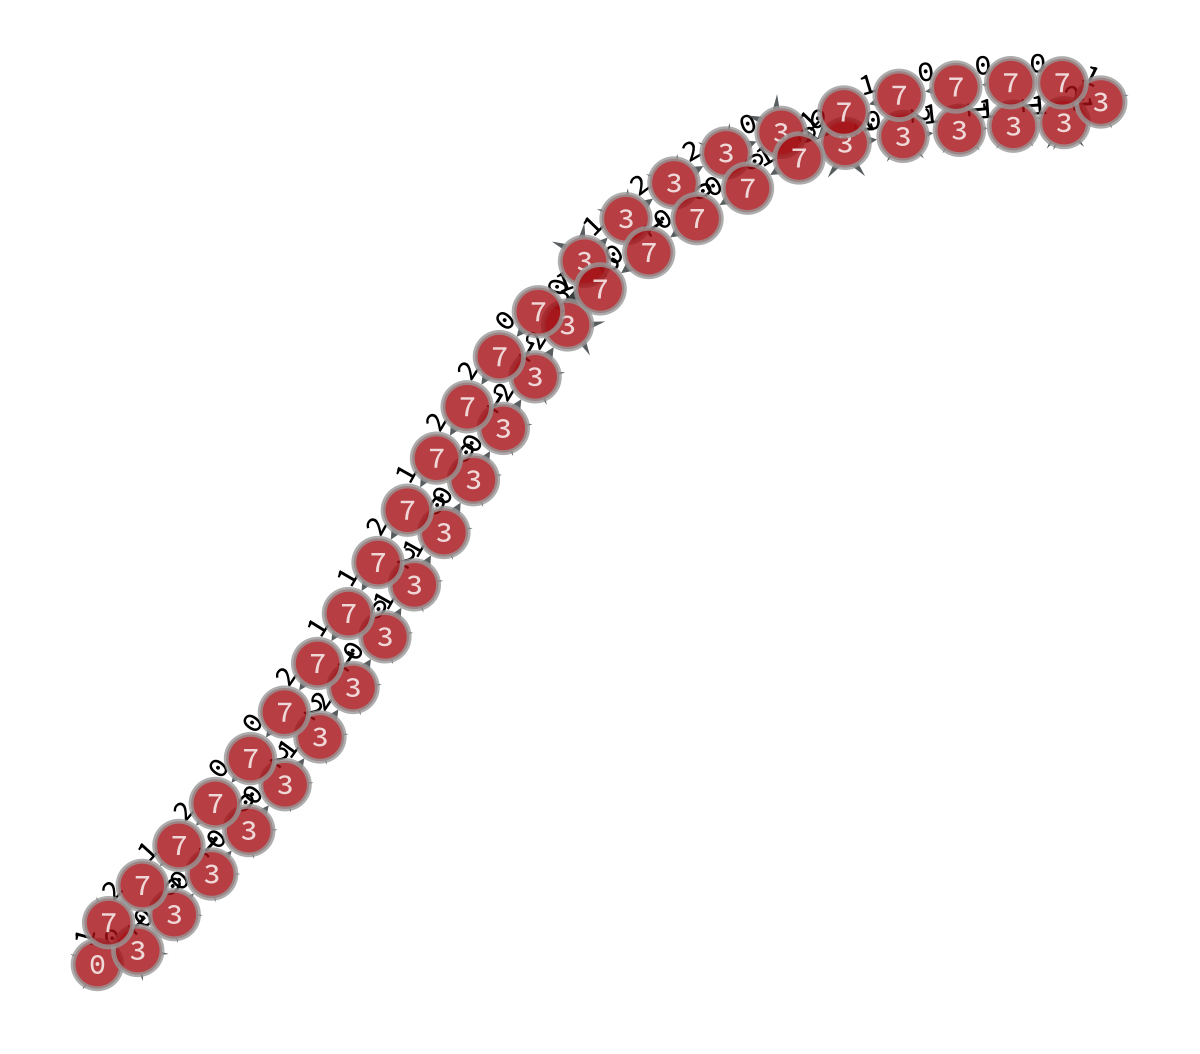

In [65]:
gprueba2 = graphCorrelator(50)

In [66]:
start = time.process_time()
print(OPT1(gprueba2))
end = time.process_time()
print("Execution Time: %s" % (end-start))

Minimum Clock Period is: 7 with c: 7.0
Retiming: [-2.0, -3.0, -3.0, -4.0, -4.0, -5.0, -4.0, -3.0, -3.0, -3.0, -2.0, -3.0, -3.0, -2.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0, -3.0, -3.0, -3.0, -3.0, -4.0, -5.0, -6.0, -6.0, -7.0, -6.0, -5.0, -5.0, -4.0, -4.0, -4.0, -3.0, -4.0, -5.0, -4.0, -4.0, -3.0]
[-2.0, -3.0, -3.0, -4.0, -4.0, -5.0, -4.0, -3.0, -3.0, -3.0, -2.0, -3.0, -3.0, -2.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0, -3.0, -3.0, -3.0, -3.0, -4.0, -5.0, -6.0, -6.0, -7.0, -6.0, -5.0, -5.0, -4.0, -4.0, -4.0, -3.0, -4.0, -5.0, -4.0, -4.0, -3.0]
Execution Time: 4.293775847999999


In [67]:
start = time.process_time()
print(OPT2(gprueba2))
end = time.process_time()
print("Execution Time: %s" % (end-start))

Minimum Achievable Clock Period is: 7 with retiming: [2, 3, 3, 4, 4, 5, 4, 3, 3, 3, 2, 3, 3, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 3, 3, 3, 3, 4, 5, 6, 6, 7, 6, 5, 5, 4, 4, 4, 3, 4, 5, 4, 4, 3]
(7, [2, 3, 3, 4, 4, 5, 4, 3, 3, 3, 2, 3, 3, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 3, 3, 3, 3, 4, 5, 6, 6, 7, 6, 5, 5, 4, 4, 4, 3, 4, 5, 4, 4, 3])
Execution Time: 36.878772760000004


# Profiling

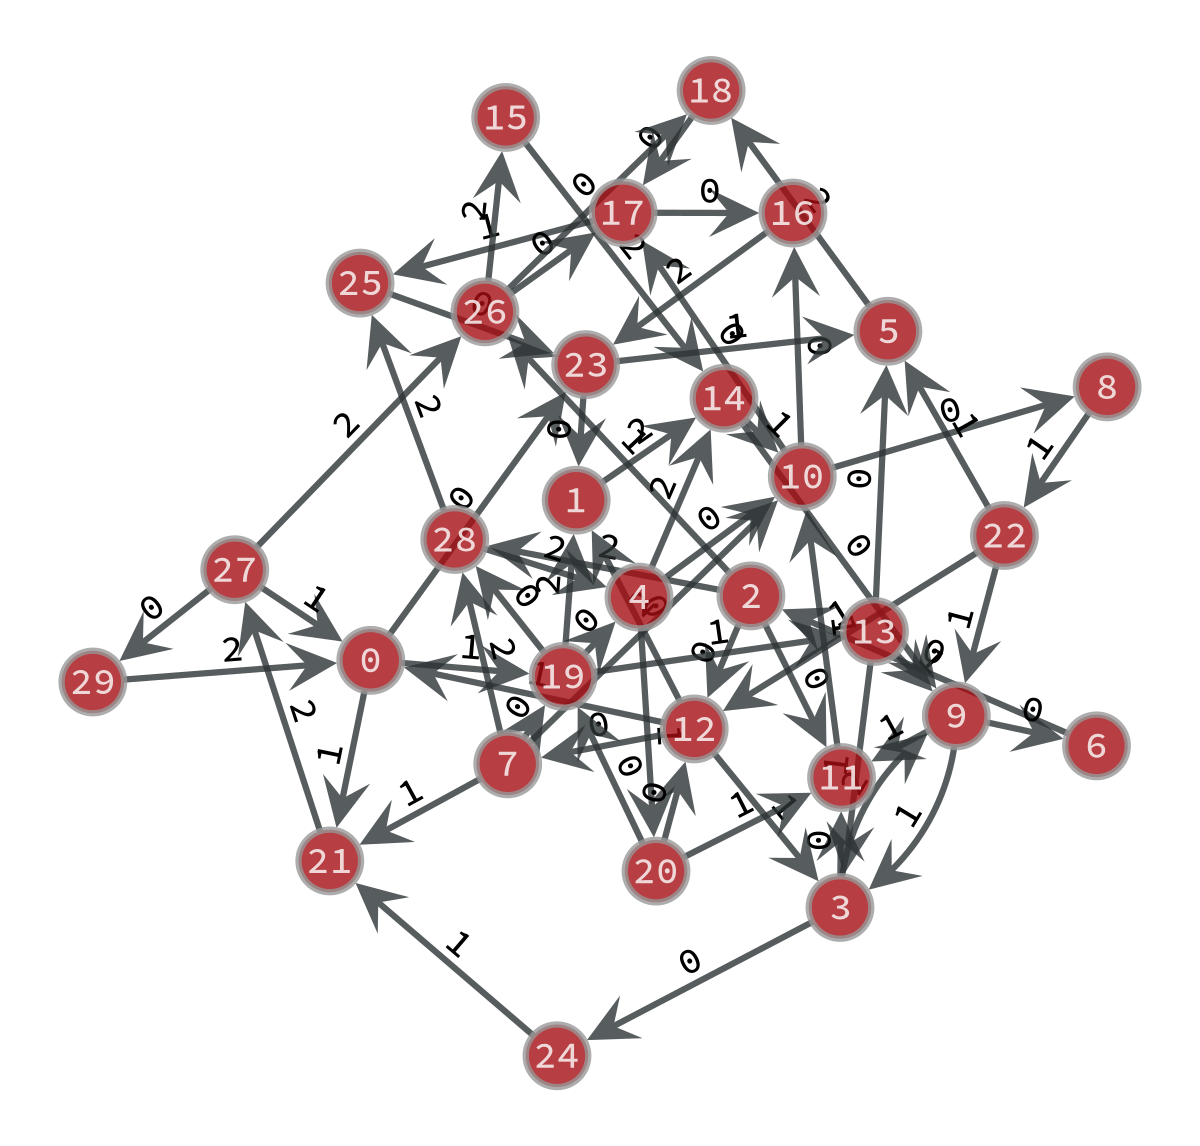

In [68]:
#Generating the Graph
maxNodeDegree = 5
gtest = graphGenerator(30)

## OPT1

In [69]:
start = time.process_time()
print(OPT1(gtest))
end = time.process_time()
print("Execution Time: %s" % (end-start))

Minimum Clock Period is: 56 with c: 62.0
Retiming: [0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, 0.0, -1.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0]
[0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, 0.0, -1.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0]
Execution Time: 1.5634568729999998


## OPT2

In [70]:
start = time.process_time()
print(OPT2(gtest))
end = time.process_time()
print("Execution Time: %s" % (end-start))

Minimum Achievable Clock Period is: 43 with retiming: [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
(43, [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])
Execution Time: 13.762795236000002


## References

[1] Leiserson, C.E., Saxe, J.B. Retiming synchronous circuitry. Algorithmica 6, 5–35 (1991). https://doi.org/10.1007/BF01759032

[2] Official Graph-Tool Documentation: https://graph-tool.skewed.de/static/doc/index.html